In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Human TRs

,chromosome,start,end,length,motif_size,copy_number,motif_seq,tr_seq,spp,motif_size_category
0,chr1,149461,149477,16,6,2.8,CACTGC,CACTGCCACTGCCCCTG,homo,6
1,chr1,151310,151326,16,6,2.8,CTGCCA,CTGCCACTGCCTCTGCC,homo,6
2,chr1,155207,155219,12,4,3.2,GGCA,GGCAGGCAGGCAG,homo,4
3,chr1,155996,156075,79,32,2.5,GCTGGGCCTGGAGAGGCCACAAAGAAGCAGGA,GCTGGGCCTGGAGGGGCCACCAAGATGCAGGAGCTGGGCCTGGAGA...,homo,7+
4,chr1,187474,187488,14,1,15.0,T,TTTTTTTTTTTTTTT,homo,1


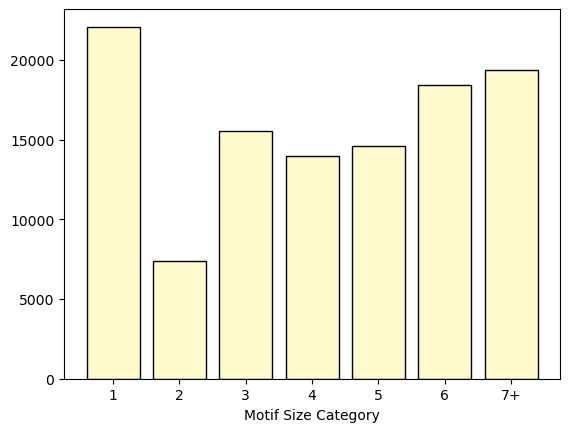

In [7]:
trs_humans = pd.read_csv('/Users/misha/Downloads/LAB/human_merged_m1_exonic.bed', sep='\t')

trs_humans['motif_size_category'] = trs_humans['motif_size'].apply(lambda x: x if x <= 6 else '7+')
trs_humans['motif_size_category'] = trs_humans['motif_size_category'].astype(str)
category_counts = trs_humans['motif_size_category'].value_counts()

custom_order = [str(i) for i in range(1, 7)] + ['7+']
category_counts = category_counts.reindex(custom_order).fillna(0)

# sort categories in specified order
category_counts = category_counts.loc[custom_order]

plt.bar(category_counts.index, category_counts.values, color='lemonchiffon', edgecolor='black')
plt.xlabel('Motif Size Category')

trs_humans.head()

In [8]:
motif_seq_counts = pd.DataFrame(trs_humans['motif_seq'].value_counts())
motif_seq_counts.columns = ['human counts']
motif_seq_counts

,human counts
motif_seq,
T,10882
A,10697
TG,1176
AC,1156
GGC,1013
...,...
CCAGAGAGGAGCACTTGGAGCCCACCTGTTGACTGGGAATCCCTTGTTTCT,1
CCAGATAGGAGCACTGGGAGCCCACCTGTTGACTGGGAATCCCTTGTTTCT,1
GATGGTGGA,1


## Shared TRs

,chromosome,start,end,length,motif_size,copy_number,motif_seq,tr_seq,spp,motif_size_category
0,chr1,8903894,8903919,25,2,13.0,AT,ATATATATACATACATATATATATAT,homo,2
1,chr1,10180436,10180481,45,2,23.0,TA,TATATATCTCTATATATCTATATATGTATATACATATAGATATATA,homo,2
2,chr1,15381370,15381404,34,2,18.0,TA,TATATATAAATATATAATATATATAAATATATATA,homo,2
3,chr1,18567864,18567881,17,2,9.0,TA,TATAAATATATATATATA,homo,2
4,chr1,18912344,18912359,15,6,2.7,CATGGC,CATTGCCATGGCCATG,homo,6


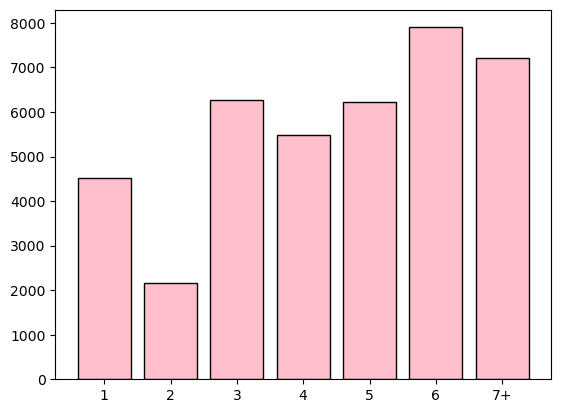

In [9]:
trs_shared = pd.read_csv('/Users/misha/Downloads/LAB/human_shared_clean_exon.bed', sep='\t')

trs_shared['motif_size_category'] = trs_shared['motif_size'].apply(lambda x: x if x <= 6 else '7+')
trs_shared['motif_size_category'] = trs_shared['motif_size_category'].astype(str)
category_counts2 = trs_shared['motif_size_category'].value_counts()

custom_order = [str(i) for i in range(1, 7)] + ['7+']
category_counts2 = category_counts2.reindex(custom_order).fillna(0)

# sort categories in specified order
category_counts2 = category_counts2.loc[custom_order]

plt.bar(category_counts2.index, category_counts2.values, color='pink', edgecolor='black')
   
trs_shared.head()

In [10]:
motif_seq_counts2 = pd.DataFrame(trs_shared['motif_seq'].value_counts())
motif_seq_counts2.columns = ['human/chimp counts']
#motif_seq_counts2['human/chimp counts'] = motif_seq_counts2['human/chimp counts'].astype(int)
motif_seq_counts2

,human/chimp counts
motif_seq,
T,2251
A,2191
GGC,393
GCC,333
TG,311
...,...
TTCTTGTGA,1
ACAAAACA,1
TTCCTCATC,1


# Merged DataFrame (counts):

In [11]:
motif_seq_counts = motif_seq_counts.reset_index()
motif_seq_counts.rename(columns={'index': 'motif_seq'}, inplace=True)

motif_seq_counts2 = motif_seq_counts2.reset_index()
motif_seq_counts2.rename(columns={'index': 'motif_seq'}, inplace=True)

merged_counts = pd.merge(motif_seq_counts, motif_seq_counts2, on='motif_seq', how='outer')
merged_counts['human/chimp counts'] = merged_counts['human/chimp counts'].fillna(0).astype(int)
merged_counts

,motif_seq,human counts,human/chimp counts
0,A,10697,2191
1,AAA,2,0
2,AAAA,4,1
3,AAAAA,2,0
4,AAAAAAAAAGC,1,0
...,...,...,...
19316,TTTTTTTCACC,1,0
19317,TTTTTTTCC,2,1
19318,TTTTTTTCG,2,0
19319,TTTTTTTTAAT,1,0


# Motif Size: 1

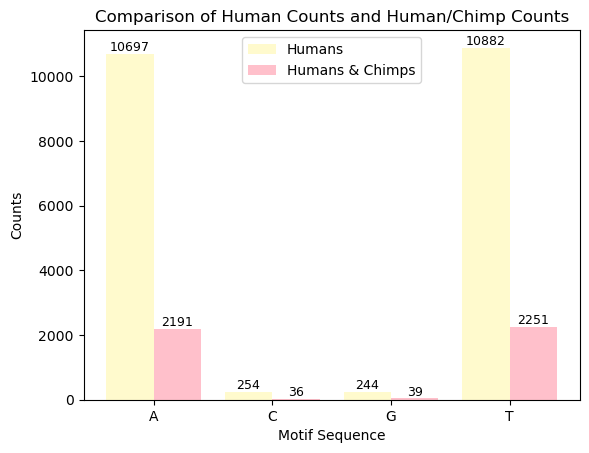

In [12]:
size_1 = merged_counts[merged_counts['motif_seq'].apply(len) == 1]
#size_1

x = np.arange(len(size_1))
width = 0.4

fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, size_1['human counts'], width, label='Humans', color='lemonchiffon')
bars2 = ax.bar(x + width/2, size_1['human/chimp counts'], width, label='Humans & Chimps', color='pink')

# counts labels
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=9, color='black')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=9, color='black')

ax.set_xlabel('Motif Sequence')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Human Counts and Human/Chimp Counts')
ax.set_xticks(x)
ax.set_xticklabels(size_1['motif_seq'])
ax.legend();

# Motif Size: 2

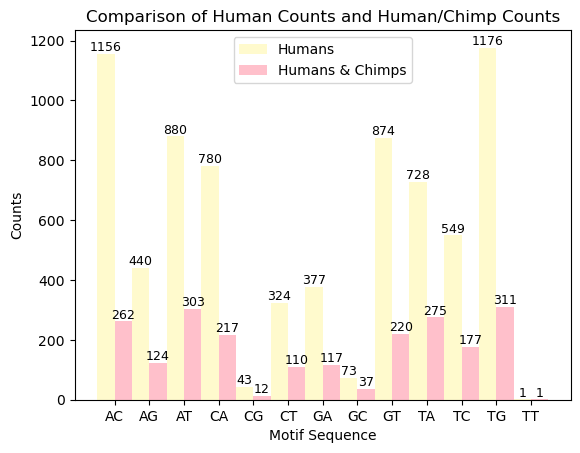

In [13]:
size_2 = merged_counts[merged_counts['motif_seq'].apply(len) == 2]
#size_2
x = np.arange(len(size_2))
width = 0.5

fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, size_2['human counts'], width, label='Humans', color='lemonchiffon')
bars2 = ax.bar(x + width/2, size_2['human/chimp counts'], width, label='Humans & Chimps', color='pink')
# counts labels
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=9, color='black')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=9, color='black')

ax.set_xlabel('Motif Sequence')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Human Counts and Human/Chimp Counts')
ax.set_xticks(x)
ax.set_xticklabels(size_2['motif_seq'])
ax.legend();

# Motif size: 3

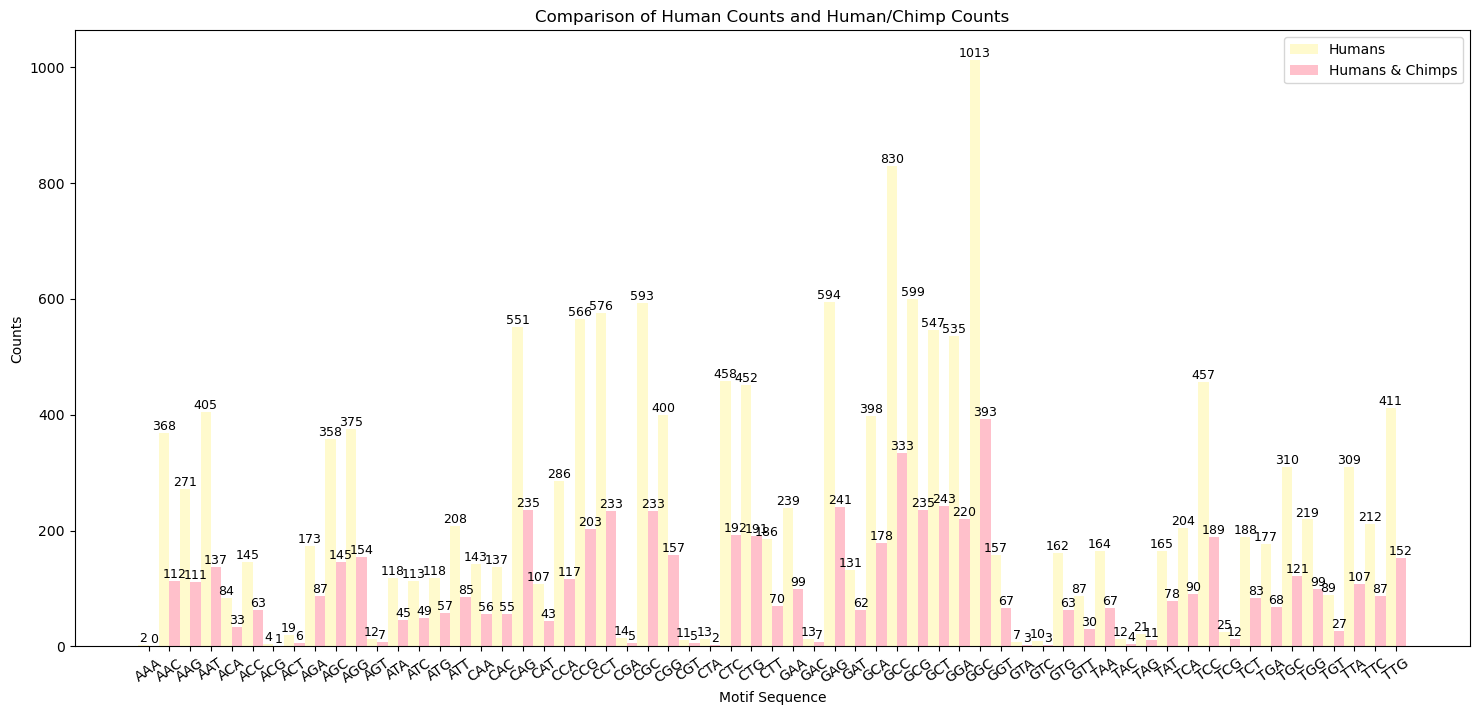

In [14]:
size_3 = merged_counts[merged_counts['motif_seq'].apply(len) == 3]
#size_3
x = np.arange(len(size_3))
width = 0.5

fig, ax = plt.subplots(figsize=(18,8))

bars1 = ax.bar(x - width/2, size_3['human counts'], width, label='Humans', color='lemonchiffon')
bars2 = ax.bar(x + width/2, size_3['human/chimp counts'], width, label='Humans & Chimps', color='pink')
# counts labels
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=9, color='black')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', fontsize=9, color='black')

ax.set_xlabel('Motif Sequence')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Human Counts and Human/Chimp Counts')
ax.set_xticks(x)
ax.set_xticklabels(size_3['motif_seq'], rotation=35)
ax.legend();

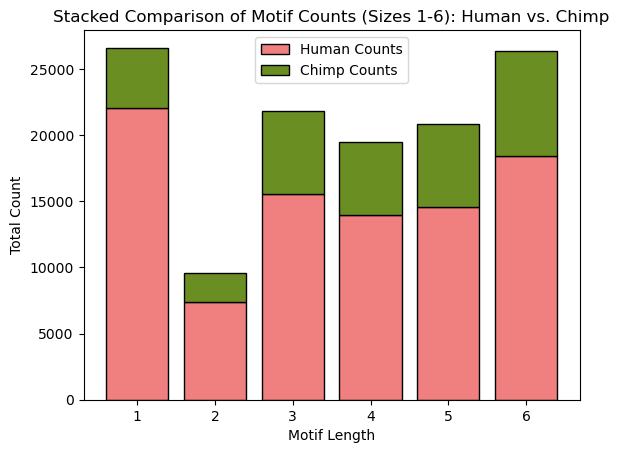

In [15]:
#plot counts- compare motif size 1-6

if 'motif_seq' in merged_counts.columns and not merged_counts.empty:
    filtered_counts = merged_counts[merged_counts['motif_seq'].apply(len).isin([1, 2, 3, 4, 5, 6])].copy()
    filtered_counts.loc[:, 'motif_length'] = filtered_counts['motif_seq'].apply(len)

    grouped_counts = filtered_counts.groupby('motif_length').agg(
        human_counts_sum=('human counts', 'sum'),
        chimp_counts_sum=('human/chimp counts', 'sum')
    ).reset_index()
    
    fig, ax = plt.subplots()
    ax.bar(grouped_counts['motif_length'], grouped_counts['human_counts_sum'], 
           label='Human Counts', color='lightcoral', edgecolor='black')

    ax.bar(grouped_counts['motif_length'], grouped_counts['chimp_counts_sum'], 
           bottom=grouped_counts['human_counts_sum'], label='Chimp Counts', 
           color='olivedrab', edgecolor='black')

    ax.set_xlabel('Motif Length')
    ax.set_ylabel('Total Count')
    ax.set_title('Stacked Comparison of Motif Counts (Sizes 1-6): Human vs. Chimp')
    ax.legend();

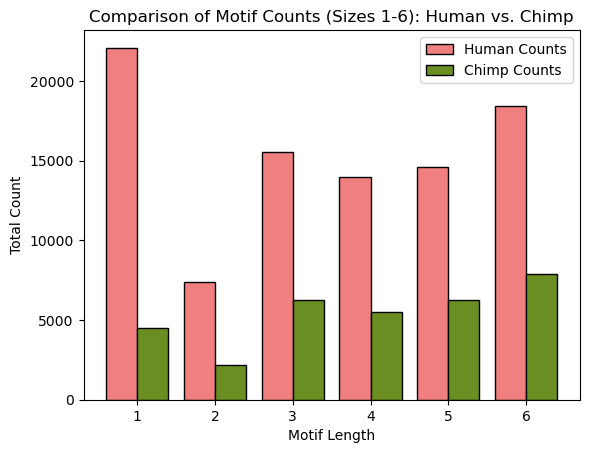

In [16]:
# all trs that are motif count 1-6 : plot the count to compare each of the motif sizes <-- going to run gene ontology on each motif 

filtered_counts = merged_counts[merged_counts['motif_seq'].apply(len).isin([1, 2, 3, 4, 5, 6])].copy()  # Add .copy() to ensure a fresh copy

filtered_counts.loc[:, 'motif_length'] = filtered_counts['motif_seq'].apply(len)

grouped_counts = filtered_counts.groupby('motif_length').agg(
    human_counts_sum=('human counts', 'sum'),
    chimp_counts_sum=('human/chimp counts', 'sum')
).reset_index()

fig, ax = plt.subplots()

ax.bar(grouped_counts['motif_length'] - 0.2, grouped_counts['human_counts_sum'], width=0.4, label='Human Counts', color='lightcoral', edgecolor='black')
ax.bar(grouped_counts['motif_length'] + 0.2, grouped_counts['chimp_counts_sum'], width=0.4, label='Chimp Counts', color='olivedrab', edgecolor='black')

ax.set_xlabel('Motif Length')
ax.set_ylabel('Total Count')
ax.set_title('Comparison of Motif Counts (Sizes 1-6): Human vs. Chimp')
ax.legend();

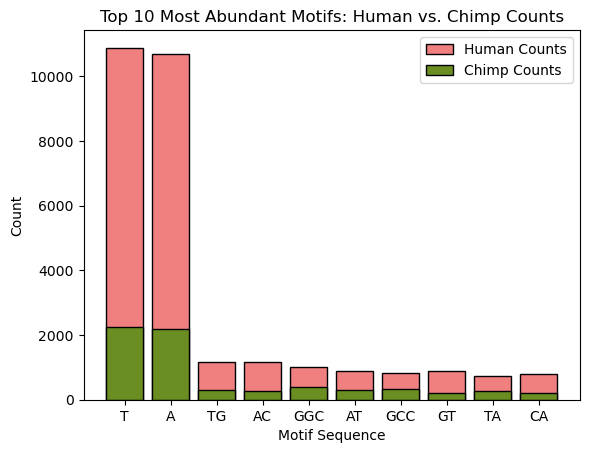

In [17]:
# sort table by total counts for each motif, plot the ~10 most abundant, when plotting separate back into humans/chimps counts
# for 1-3 (sequence composition)

merged_counts['total_counts'] = merged_counts['human counts'] + merged_counts['human/chimp counts']
sorted_merged_counts = merged_counts.sort_values(by='total_counts', ascending=False)

top_10_motifs = sorted_merged_counts.head(10)
fig, ax = plt.subplots()

ax.bar(top_10_motifs['motif_seq'], top_10_motifs['human counts'], label='Human Counts', color='lightcoral', edgecolor='black')

ax.bar(top_10_motifs['motif_seq'], top_10_motifs['human/chimp counts'], label='Chimp Counts', color='olivedrab', edgecolor='black')
ax.set_xlabel('Motif Sequence')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Abundant Motifs: Human vs. Chimp Counts')
ax.legend();

# TRS_shared: intersected.bed

In [18]:
# size (future- any specific pathways?)
#shared_trs INTERSECT WITH EXON_1 and pull out source_gene and plug into shiny go for all 6 motif sizes, get lollipop plot and ...
#networks(green circles)

### converting all motifs back to .bed files, then intersect those and then pull ensg values from each .bed file..

In [19]:
motif_1 = trs_shared[trs_shared['motif_seq'].apply(len) == 1]
motif_1.to_csv('/Users/misha/Downloads/LAB/motif_1.bed', sep='\t', index=False, header=False)
motif_2 = trs_shared[trs_shared['motif_seq'].apply(len) == 2]
motif_2.to_csv('/Users/misha/Downloads/LAB/motif_2.bed', sep='\t', index=False, header=False)
motif_3 = trs_shared[trs_shared['motif_seq'].apply(len) == 3]
motif_3.to_csv('/Users/misha/Downloads/LAB/motif_3.bed', sep='\t', index=False, header=False)
motif_4 = trs_shared[trs_shared['motif_seq'].apply(len) == 4]
motif_4.to_csv('/Users/misha/Downloads/LAB/motif_4.bed', sep='\t', index=False, header=False)
motif_5 = trs_shared[trs_shared['motif_seq'].apply(len) == 5]
motif_5.to_csv('/Users/misha/Downloads/LAB/motif_5.bed', sep='\t', index=False, header=False)
motif_6 = trs_shared[trs_shared['motif_seq'].apply(len) == 6]
motif_6.to_csv('/Users/misha/Downloads/LAB/motif_6.bed', sep='\t', index=False, header=False)

In [20]:
def extract_ensembl_ids(input_file, output_file):
    """
    Extracts unique Ensembl gene IDs (ENSG format) from column 9 of a .bed file and saves them to a .txt file.

    Parameters:
    - input_file (str): Path to the input .bed file.
    - output_file (str): Path to save the extracted Ensembl IDs.
    """

    # Load the .bed file (assuming tab-separated values)
    df = pd.read_csv(input_file, sep='\t', header=None)

    # Ensure the file has at least 10 columns
    if df.shape[1] < 10:
        print(f"Skipping {input_file}: Less than 10 columns found.")
        return

    # Extract column 9 (0-based index 8)
    col_9 = df[9].astype(str)

    # Extract Ensembl IDs (starting with 'ENSG')
    ensembl_ids = []
    for item in col_9:
        ids = re.findall(r'ENSG\d+', item)
        ensembl_ids.extend(ids)

    # Remove duplicates
    ensembl_ids = list(set(ensembl_ids))

    # Save to output file
    with open(output_file, "w") as f:
        for ensembl_id in ensembl_ids:
            f.write(ensembl_id + "\n")

    print(f"Ensembl IDs saved to {output_file}")

# Apply the function for motif sizes 1-6
for motif_size in range(1, 7):
    input_path = f"/Users/misha/Downloads/LAB/{motif_size}_int.bed"
    output_path = f"/Users/misha/Downloads/LAB/motif_{motif_size}_ensembl_ids.txt"
    
    extract_ensembl_ids(input_path, output_path)

Ensembl IDs saved to /Users/misha/Downloads/LAB/motif_1_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/motif_2_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/motif_3_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/motif_4_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/motif_5_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/motif_6_ensembl_ids.txt


In [29]:
import pandas as pd
import os

# Define the output merged file
merged_file = "/Users/misha/Downloads/LAB/motif_shared_merged.bed"

# List to store dataframes
dfs = []

# Loop through motif files and read them
for motif_size in range(1, 7):
    input_path = f"/Users/misha/Downloads/LAB/motif_{motif_size}.bed"
    
    if os.path.exists(input_path):
        df = pd.read_csv(input_path, sep='\t', header=None)  # Load without headers
        df["category"] = "shared"  # Add category column
        dfs.append(df)
    else:
        print(f"File not found: {input_path}")

# Merge all dataframes
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df.to_csv(merged_file, sep='\t', index=False, header=False)
    print(f"Merged file saved to {merged_file}")
else:
    print("No valid motif files found.")

Merged file saved to /Users/misha/Downloads/LAB/motif_shared_merged.bed


In [21]:
import glob

# Define the file path pattern for the motif size CSV files
file_pattern = '/Users/misha/Downloads/LAB/*_enrichment_all.csv'

# Load all CSV files into a dictionary with motif size as the key
files = {int(f.split('/')[-1].split('_')[0]): pd.read_csv(f) for f in glob.glob(file_pattern)}

# Group pathways by motif size
pathways_by_motif = {}
for motif_size, df in files.items():
    pathways_by_motif[motif_size] = set(df['Pathway'].dropna())

# Identify unique pathways across motif sizes
unique_pathways = {}
all_pathways = set().union(*pathways_by_motif.values())
for pathway in all_pathways:
    present_in_motif_sizes = [size for size, paths in pathways_by_motif.items() if pathway in paths]
    if len(present_in_motif_sizes) < len(pathways_by_motif):
        unique_pathways[pathway] = present_in_motif_sizes

# Output the results
for pathway, motif_sizes in unique_pathways.items():
    print(f'Pathway: {pathway}, Present in Motif Sizes: {motif_sizes}')


Pathway: Path:hsa04068 FoxO signaling pathway, Present in Motif Sizes: [2, 1, 4, 5, 6]
Pathway: Path:hsa05205 Proteoglycans in cancer, Present in Motif Sizes: [1, 4, 5, 6, 3]
Pathway: Path:hsa00532 Glycosaminoglycan biosynthesis-chondroitin sulfate/dermatan sulfate, Present in Motif Sizes: [1, 5]
Pathway: Path:hsa04910 Insulin signaling pathway, Present in Motif Sizes: [1, 6]
Pathway: Path:hsa03015 mRNA surveillance pathway, Present in Motif Sizes: [6]
Pathway: Path:hsa04934 Cushing syndrome, Present in Motif Sizes: [2, 1, 5, 6, 3]
Pathway: Path:hsa01522 Endocrine resistance, Present in Motif Sizes: [1, 4, 5]
Pathway: Path:hsa01521 EGFR tyrosine kinase inhibitor resistance, Present in Motif Sizes: [2, 1, 4, 5, 6]
Pathway: Path:hsa04390 Hippo signaling pathway, Present in Motif Sizes: [2, 1, 5, 6, 3]
Pathway: Path:hsa04062 Chemokine signaling pathway, Present in Motif Sizes: [1]
Pathway: Path:hsa04520 Adherens junction, Present in Motif Sizes: [4, 5, 6]
Pathway: Path:hsa05100 Bacterial 

## TRS_human: intersected.bed

In [22]:
motif_1 = trs_humans[trs_humans['motif_seq'].apply(len) == 1]
motif_1.to_csv('/Users/misha/Downloads/LAB/h_motif_1.bed', sep='\t', index=False, header=False)
motif_2 = trs_humans[trs_humans['motif_seq'].apply(len) == 2]
motif_2.to_csv('/Users/misha/Downloads/LAB/h_motif_2.bed', sep='\t', index=False, header=False)
motif_3 = trs_humans[trs_humans['motif_seq'].apply(len) == 3]
motif_3.to_csv('/Users/misha/Downloads/LAB/h_motif_3.bed', sep='\t', index=False, header=False)
motif_4 = trs_humans[trs_humans['motif_seq'].apply(len) == 4]
motif_4.to_csv('/Users/misha/Downloads/LAB/h_motif_4.bed', sep='\t', index=False, header=False)
motif_5 = trs_humans[trs_humans['motif_seq'].apply(len) == 5]
motif_5.to_csv('/Users/misha/Downloads/LAB/h_motif_5.bed', sep='\t', index=False, header=False)
motif_6 = trs_humans[trs_humans['motif_seq'].apply(len) == 6]
motif_6.to_csv('/Users/misha/Downloads/LAB/h_motif_6.bed', sep='\t', index=False, header=False)

In [23]:
def extract_ensembl_ids(input_file, output_file):
    """
    Extracts unique Ensembl gene IDs (ENSG format) from column 9 of a .bed file and saves them to a .txt file.

    Parameters:
    - input_file (str): Path to the input .bed file.
    - output_file (str): Path to save the extracted Ensembl IDs.
    """

    try:
        # Load the .bed file (assuming tab-separated values)
        df = pd.read_csv(input_file, sep='\t', header=None)

        # Ensure the file has at least 9 columns (zero-based index 8)
        if df.shape[1] < 9:
            print(f"Skipping {input_file}: Less than 9 columns found.")
            return

        # Extract column 9 (0-based index 8)
        col_9 = df[8].astype(str)

        # Extract Ensembl IDs (starting with 'ENSG')
        ensembl_ids = set()
        for item in col_9:
            ids = re.findall(r'ENSG\d+', item)
            ensembl_ids.update(ids)

        # Save to output file
        with open(output_file, "w") as f:
            for ensembl_id in sorted(ensembl_ids):
                f.write(ensembl_id + "\n")

        print(f"Ensembl IDs saved to {output_file}")

    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Apply the function for motif sizes 1-6 with corrected filenames
for motif_size in range(1, 7):
    input_path = f"/Users/misha/Downloads/LAB/h_motif_{motif_size}.bed"
    output_path = f"/Users/misha/Downloads/LAB/h_motif_{motif_size}_ensembl_ids.txt"
    
    extract_ensembl_ids(input_path, output_path)

Ensembl IDs saved to /Users/misha/Downloads/LAB/h_motif_1_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/h_motif_2_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/h_motif_3_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/h_motif_4_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/h_motif_5_ensembl_ids.txt
Ensembl IDs saved to /Users/misha/Downloads/LAB/h_motif_6_ensembl_ids.txt


In [24]:
# Define the output merged file
merged_file = "/Users/misha/Downloads/LAB/h_motif_merged.bed"

# List to store dataframes
dfs = []

# Loop through motif files and read them
for motif_size in range(1, 7):
    input_path = f"/Users/misha/Downloads/LAB/h_motif_{motif_size}.bed"
    
    if os.path.exists(input_path):
        df = pd.read_csv(input_path, sep='\t', header=None)  # Load without headers
        df["species"] = "humans"  # Add species column
        dfs.append(df)
    else:
        print(f"File not found: {input_path}")

# Merge all dataframes
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df.to_csv(merged_file, sep='\t', index=False, header=False)
    print(f"Merged file saved to {merged_file}")
else:
    print("No valid motif files found.")

Merged file saved to /Users/misha/Downloads/LAB/h_motif_merged.bed


In [33]:
h_motif_merged = pd.read_csv('/Users/misha/Downloads/LAB/h_motif_merged.bed', header=None, sep='\t')
s_motif_merged = pd.read_csv('/Users/misha/Downloads/LAB/motif_shared_merged.bed', header=None, sep='\t')

output_file = "/Users/misha/Downloads/LAB/motif_all_merged.bed"

motif_all_merged = pd.concat([h_motif_merged, s_motif_merged], ignore_index=True)

# Save to output file
motif_all_merged.to_csv(output_file, sep='\t', index=False, header=False)

print(f"Final merged file saved to {output_file}")

Final merged file saved to /Users/misha/Downloads/LAB/motif_all_merged.bed


In [34]:
motif_all = pd.read_csv('/Users/misha/Downloads/LAB/motif_all_merged.bed', header=None, sep='\t')
motif_all.head()

,0,1,2,3,4,5,6,7,8,9,10
0,chr1,187474,187488,14,1,15.0,T,TTTTTTTTTTTTTTT,homo,1,humans
1,chr1,191671,191688,17,1,18.0,A,AAAAAAAAAAAAAAAAAA,homo,1,humans
2,chr1,273496,273511,15,1,16.0,T,TTTTGTTTTTTTTTTT,homo,1,humans
3,chr1,344594,344633,39,1,40.0,A,AAAAAAAAAAAAAAAGAAGAAAGAAAAAGAAAAAAAGAAA,homo,1,humans
4,chr1,386847,386868,21,1,22.0,T,TTTTTTTTTTTTTTTTTTTTTT,homo,1,humans
